In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)

data = data['passengers']

In [6]:
type(data)

pandas.core.series.Series

In [7]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [8]:
data = np.array(data).reshape(-1,1)

In [9]:
type(data)

numpy.ndarray

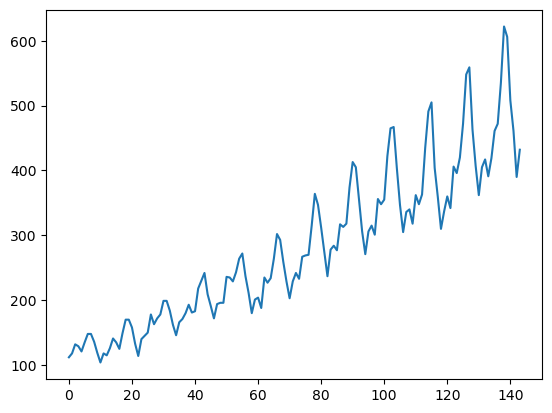

In [10]:
plt.plot(data)
plt.show()

In [11]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [12]:
len(data)

144

In [13]:
train = data[0:100,:]
test = data[100:,:]

In [20]:
def get_data(data,steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX),np.array(dataY)

In [21]:
steps = 2

In [22]:
X_train, y_train = get_data(train,steps)
X_test, y_test = get_data(test, steps)

In [23]:
X_train = np.reshape(X_train ,(X_train.shape[0], 1,  X_train.shape[1]))
X_test = np.reshape(X_test ,(X_test.shape[0], 1, X_test.shape[1]))

In [24]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, epochs=25, batch_size = 1)

Epoch 1/25
97/97 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 2/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 3/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 4/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 5/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 6/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 7/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 8/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 9/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 10/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 11/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 12/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 13/25
97/97 [==============================

In [27]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [28]:
y_pred = scaler.inverse_transform(y_pred)#Degerleri düzgün görebilmek için bunu yapıyoruz
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

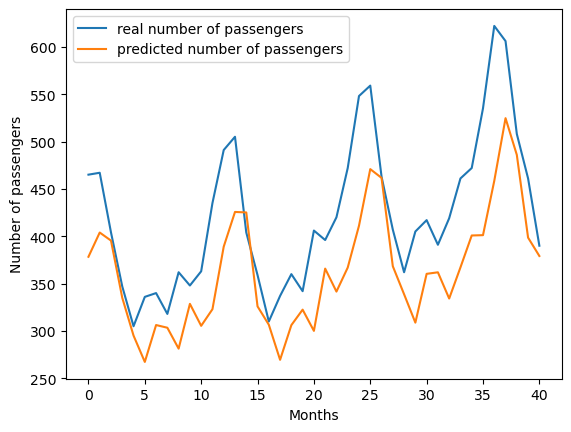

In [29]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.xlabel ('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()